In [1]:
import pandas as pd
data= pd.read_csv("/content/titles.csv")
data.head(5)

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [3]:
data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [4]:
data['type'].value_counts()

type
MOVIE    3744
SHOW     2106
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt

<Axes: xlabel='type'>

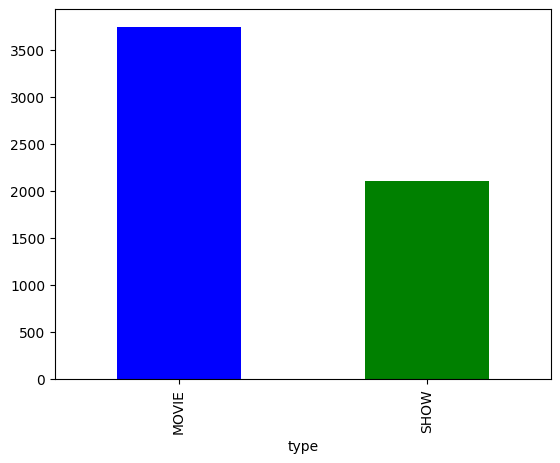

In [6]:
data['type'].value_counts().plot(kind='bar',color=['blue', 'green'])

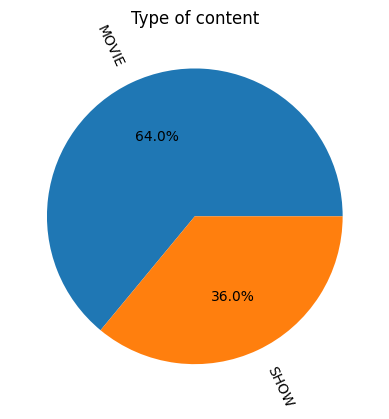

In [11]:
plt.pie(data['type'].value_counts(),labels=data['type'].value_counts().index, autopct='%1.1f%%',rotatelabels= True)
plt.title('Type of content')
plt.show()

In [12]:
data['age_certification'].value_counts()

age_certification
TV-MA    883
R        556
TV-14    474
PG-13    451
PG       233
TV-PG    188
G        124
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: count, dtype: int64

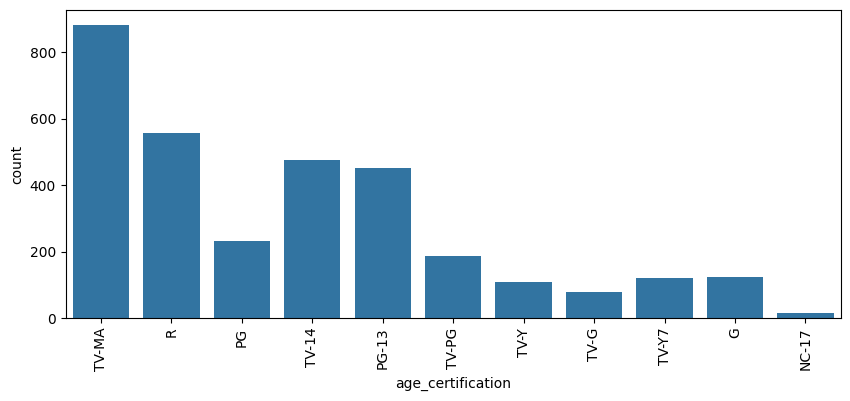

In [23]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.countplot(x= 'age_certification', data=data)
plt.xticks(rotation=90)
plt.show()

In [46]:
countries= data.groupby('production_countries').size().sort_values(ascending=False)
countries_Top_10= countries.head(10)
countries_Top_10

production_countries
['US']    1959
['IN']     599
['JP']     264
[]         229
['KR']     222
['GB']     218
['ES']     161
['FR']     125
['CA']     107
['MX']      98
dtype: int64

<ipython-input-48-5b6ba1b28a9c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries_Top_10.index,y=countries_Top_10.values,palette='viridis')


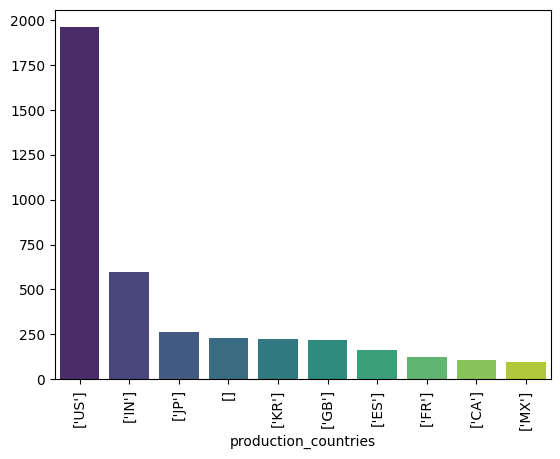

In [48]:
sns.barplot(x=countries_Top_10.index,y=countries_Top_10.values,palette='viridis')
plt.xticks(rotation=90)
plt.show()

<ipython-input-54-bf4a119d5a23>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Release_year_top_10.index,y=Release_year_top_10.values,palette='viridis')


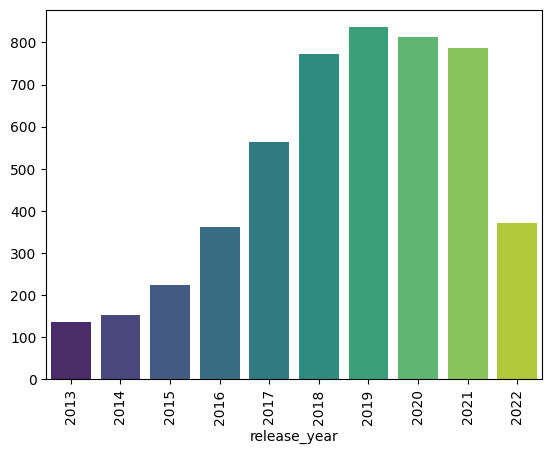

In [54]:
Release_year= data['release_year'].groupby(data['release_year']).size().sort_values(ascending=False)
Release_year_top_10= Release_year.head(10)
Release_year_top_10
sns.barplot(x=Release_year_top_10.index,y=Release_year_top_10.values,palette='viridis')
plt.xticks(rotation=90)
plt.show()

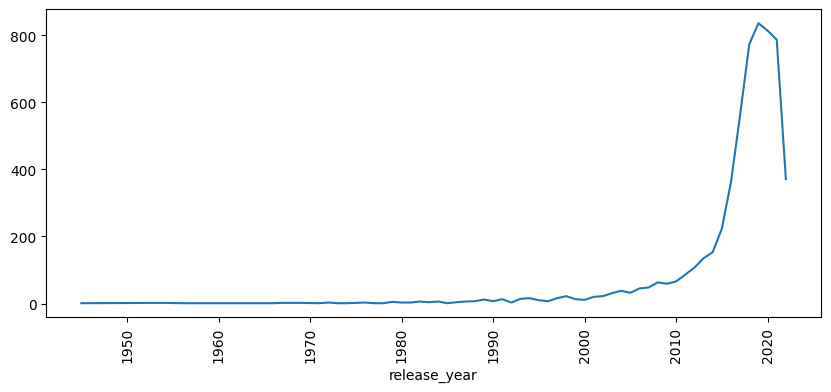

In [59]:
Release_year
plt.figure(figsize=(10,4))
sns.lineplot(x=Release_year.index,y=Release_year.values)
plt.xticks(rotation=90)
plt.show()



In [65]:
plt.figure(figsize=(24,12),dpi=100)
sns.countplot(data= data, x= 'age_certification', hue= 'genres', palette = 'magma')


<Axes: xlabel='age_certification', ylabel='count'>

In [74]:
df= data.groupby('genres')[['imdb_score']].mean().reset_index().sort_values(by='imdb_score', ascending= False)
df_top_10= df.head(10)
df_top_10

genres  imdb_score
1413  ['scifi', 'animation', 'action', 'family', 'fa...         9.3
157   ['action', 'scifi', 'animation', 'horror', 'dr...         9.0
1386  ['scifi', 'action', 'drama', 'animation', 'fan...         9.0
355   ['animation', 'thriller', 'scifi', 'drama', 'f...         9.0
6          ['action', 'animation', 'comedy', 'fantasy']         9.0
241   ['animation', 'action', 'scifi', 'western', 'c...         8.9
108   ['action', 'drama', 'thriller', 'romance', 'co...         8.8
216   ['animation', 'action', 'comedy', 'drama', 'fa...         8.8
226   ['animation', 'action', 'drama', 'war', 'histo...         8.8
173            ['action', 'scifi', 'music', 'thriller']         8.8

<ipython-input-75-477966a511d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_top_10['genres'], y= df_top_10['imdb_score'], palette= 'viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, "['scifi', 'animation', 'action', 'family', 'fantasy']"),
  Text(1, 0, "['action', 'scifi', 'animation', 'horror', 'drama', 'fantasy']"),
  Text(2, 0, "['scifi', 'action', 'drama', 'animation', 'fantasy']"),
  Text(3, 0, "['animation', 'thriller', 'scifi', 'drama', 'fantasy', 'crime']"),
  Text(4, 0, "['action', 'animation', 'comedy', 'fantasy']"),
  Text(5, 0, "['animation', 'action', 'scifi', 'western', 'comedy', 'drama', 'thriller']"),
  Text(6, 0, "['action', 'drama', 'thriller', 'romance', 'comedy', 'fantasy', 'horror']"),
  Text(7, 0, "['animation', 'action', 'comedy', 'drama', 'fantasy']"),
  Text(8, 0, "['animation', 'action', 'drama', 'war', 'history']"),
  Text(9, 0, "['action', 'scifi', 'music', 'thriller']")])

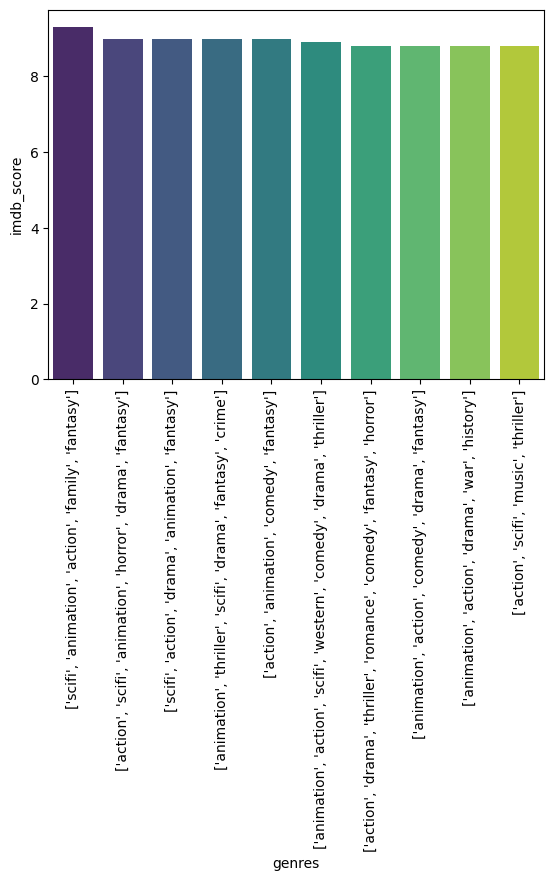

In [75]:
sns.barplot(x= df_top_10['genres'], y= df_top_10['imdb_score'], palette= 'viridis')
plt.xticks(rotation=90)

In [81]:
b= data.groupby('genres')[['tmdb_score']].sum().reset_index().sort_values(by='tmdb_score', ascending= False)
b_top_10= b.head(10)
b_top_10



genres  tmdb_score
563                       ['comedy']    3011.170
715                ['documentation']    2140.174
1061                       ['drama']    1871.365
959             ['drama', 'romance']     841.022
458              ['comedy', 'drama']     823.171
1294                     ['reality']     758.900
808              ['drama', 'comedy']     725.005
414      ['comedy', 'documentation']     682.000
449   ['comedy', 'drama', 'romance']     432.845
541            ['comedy', 'romance']     418.503

<ipython-input-82-f8ec6ccf2d39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres',y='tmdb_score',data= b_top_10, palette= 'viridis')


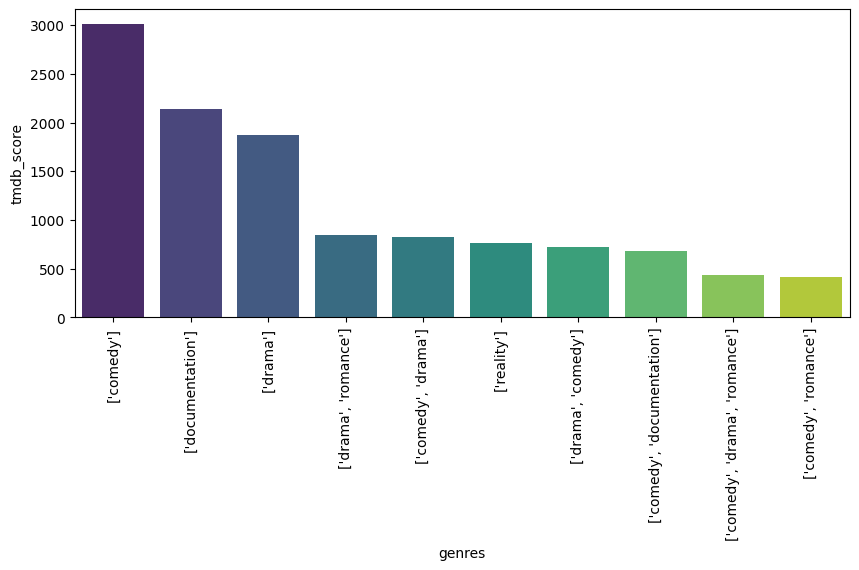

In [82]:
plt.figure(figsize=(10,4))
sns.barplot(x='genres',y='tmdb_score',data= b_top_10, palette= 'viridis')
plt.xticks(rotation=90)
plt.show()

In [83]:
data.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

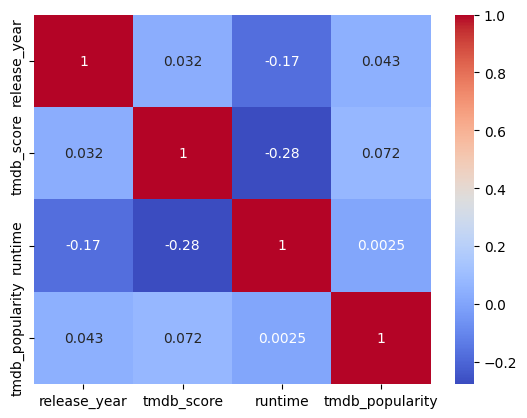

In [95]:
df_num= data[['release_year','tmdb_score', 'runtime', 'tmdb_popularity']]
sns.heatmap(df_num.corr(), annot= True, cmap= 'coolwarm')
plt.show()